In [2]:
import os 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
os.chdir('C:/Users/vaibh/Documents/Downloads/DATA ScIence/pyhon/')

In [11]:
df = pd.read_csv('Zomato data .csv')

In [13]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


 # convert the data type

In [15]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# type of resturant

In [19]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of returant')

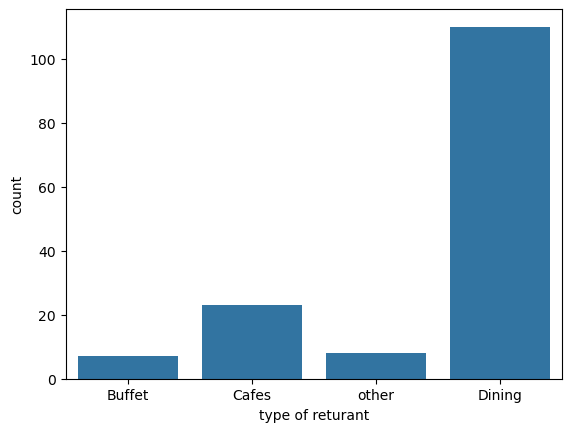

In [21]:
sns.countplot(x = df['listed_in(type)'])
plt.xlabel('type of returant')

In [23]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [25]:
group_data = df.groupby(by = ['listed_in(type)'])['votes'].sum()

In [72]:
result = pd.DataFrame({'votes':group_data})

In [74]:
result

,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


Text(0, 0.5, 'votes')

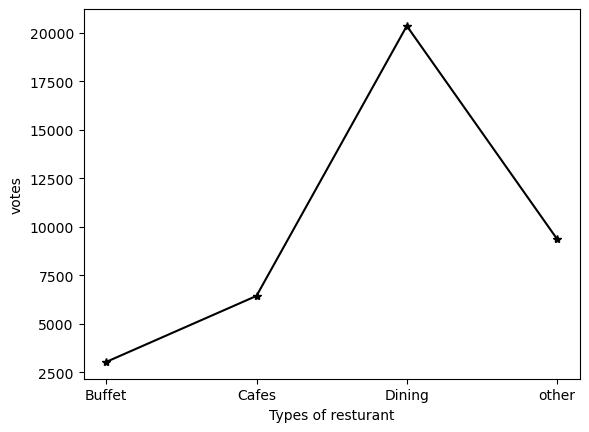

In [27]:
plt.plot(group_data, c = 'black', marker = '*')
plt.xlabel('Types of resturant')
plt.ylabel('votes')

df.head()

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [31]:
couple_data = df['approx_cost(for two people)']

In [107]:
couple_data

0      800
1      800
2      800
3      300
4      600
      ... 
143    100
144    150
145    450
146    800
147    200
Name: approx_cost(for two people), Length: 148, dtype: int64

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

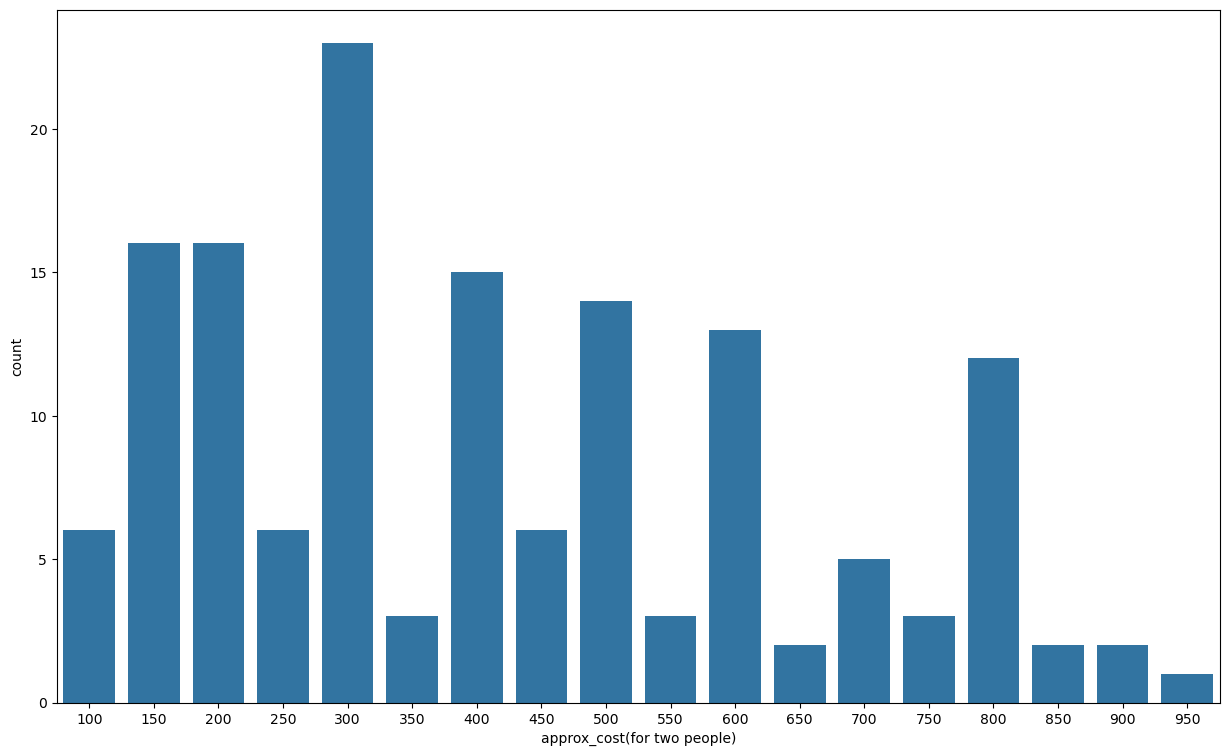

In [45]:
plt.figure(figsize=(15,9))
sns.countplot(x = couple_data)

# which mode receives maximum rating

<Axes: xlabel='online_order', ylabel='rate'>

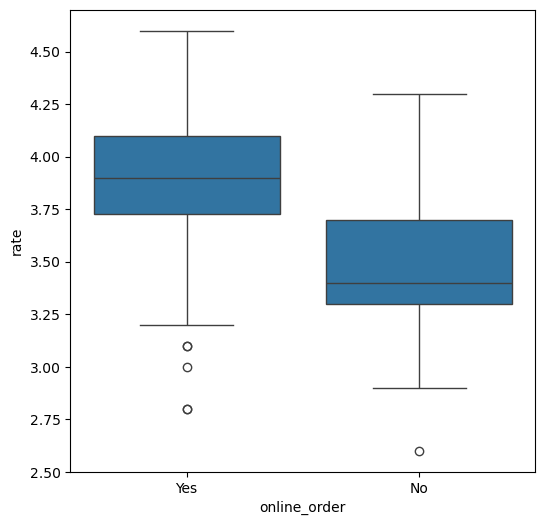

In [47]:
plt.figure(figsize=(6,6))
sns.boxplot(x = 'online_order', y='rate', data = df)

In [138]:
Pivot_table = df.pivot_table(index = 'listed_in(type)', columns ='online_order', aggfunc = 'size', fill_value=0)


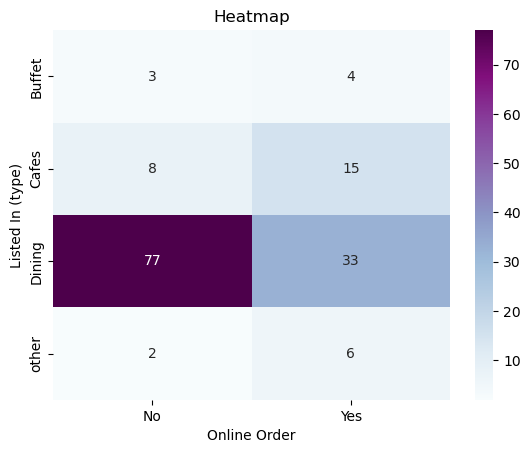

In [189]:
sns.heatmap(Pivot_table,annot = True, cmap = 'BuPu')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (type)")
plt.show()